In [33]:
import pandas as pd
data = pd.read_csv('Churn_Modelling.csv') 

In [23]:
print("Columns in the dataset:")
print(data.columns)

Columns in the dataset:
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [29]:
print(data.info)

<bound method DataFrame.info of       CreditScore  Age  Tenure  HasCrCard  IsActiveMember  EstimatedSalary  \
0             619   42       2          1               1        101348.88   
1             608   41       1          0               1        112542.58   
2             502   42       8          1               0        113931.57   
3             699   39       1          0               0         93826.63   
4             850   43       2          1               1         79084.10   
...           ...  ...     ...        ...             ...              ...   
9995          771   39       5          1               0         96270.64   
9996          516   35      10          1               1        101699.77   
9997          709   36       7          0               1         42085.58   
9998          772   42       3          1               0         92888.52   
9999          792   28       4          1               0         38190.78   

      Exited  Geography_Germany

In [32]:
print(data.head)

<bound method NDFrame.head of       CreditScore  Age  Tenure  HasCrCard  IsActiveMember  EstimatedSalary  \
0             619   42       2          1               1        101348.88   
1             608   41       1          0               1        112542.58   
2             502   42       8          1               0        113931.57   
3             699   39       1          0               0         93826.63   
4             850   43       2          1               1         79084.10   
...           ...  ...     ...        ...             ...              ...   
9995          771   39       5          1               0         96270.64   
9996          516   35      10          1               1        101699.77   
9997          709   36       7          0               1         42085.58   
9998          772   42       3          1               0         92888.52   
9999          792   28       4          1               0         38190.78   

      Exited  Geography_Germany  

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

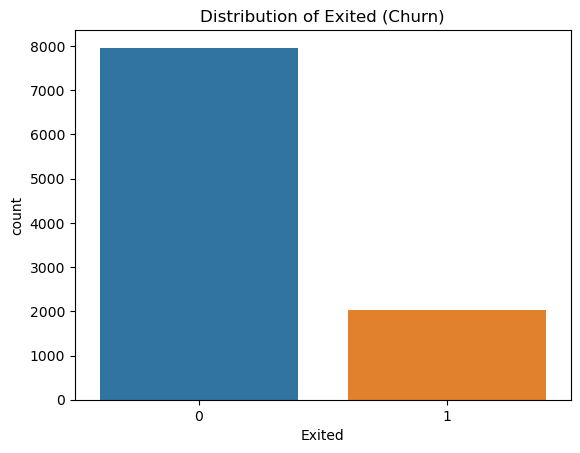

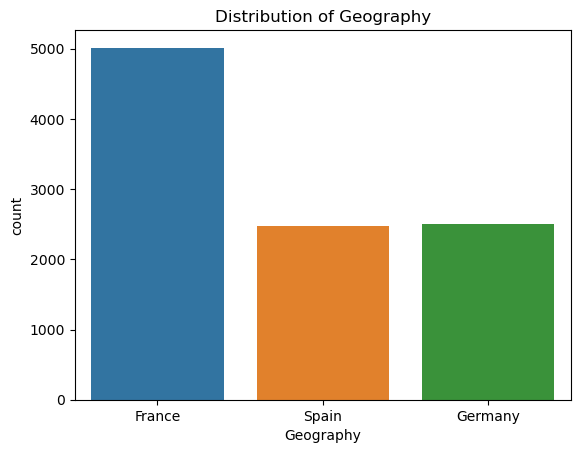

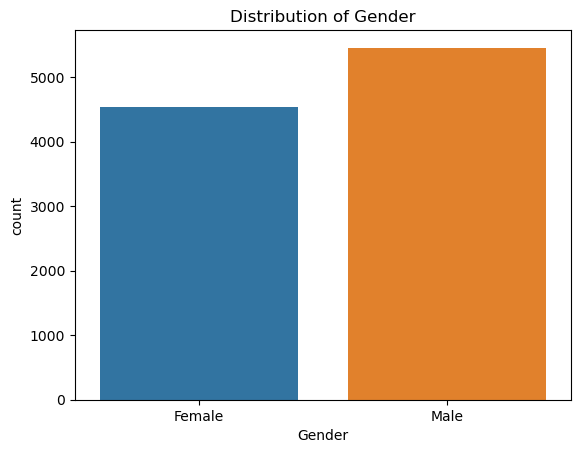

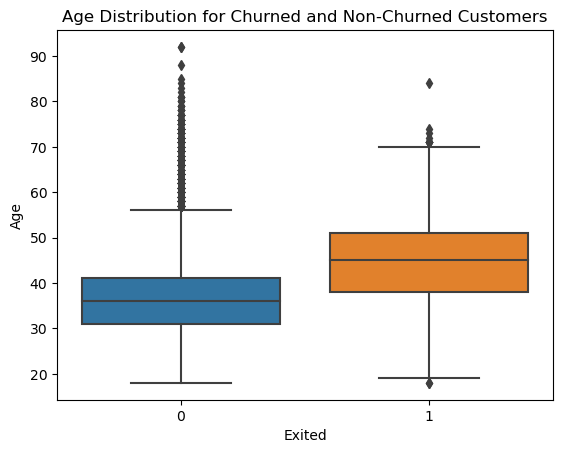

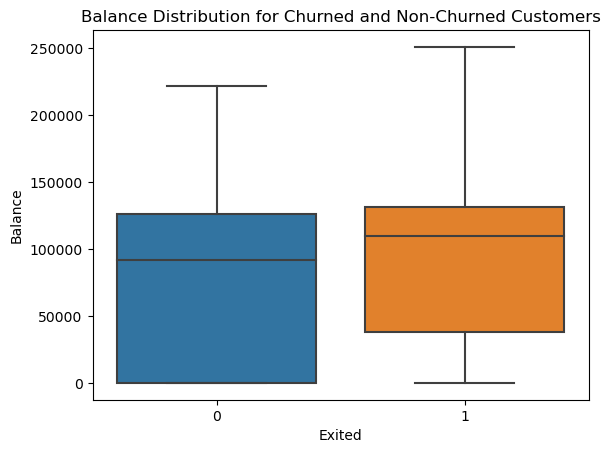

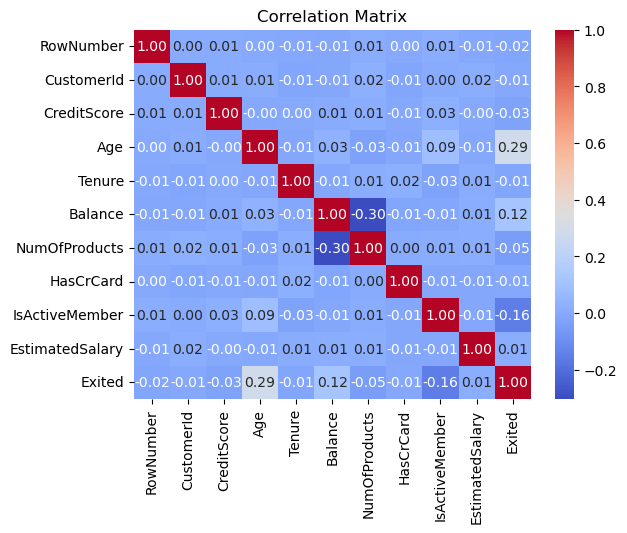

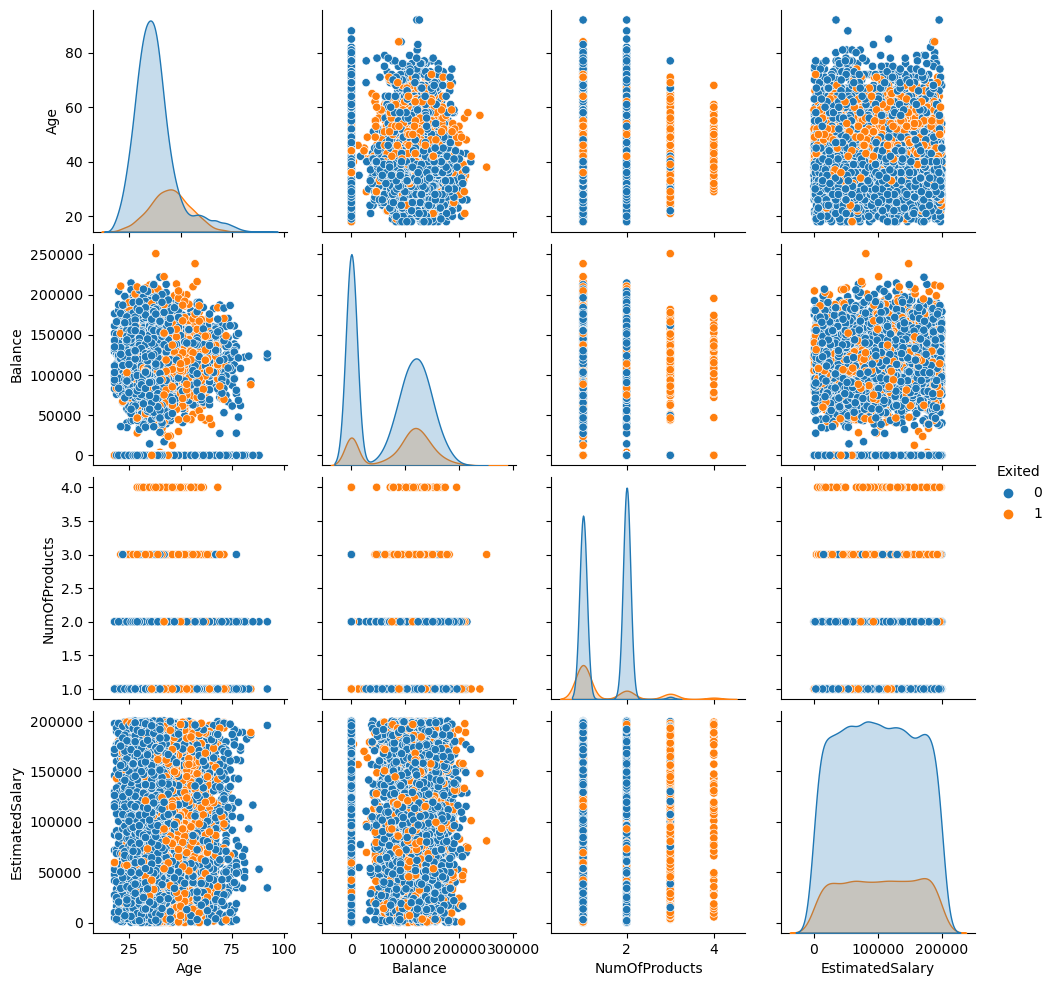

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

print(data.describe())

print("Missing values:\n", data.isnull().sum())

sns.countplot(x='Exited', data=data)
plt.title('Distribution of Exited (Churn)')
plt.show()

sns.countplot(x='Geography', data=data)
plt.title('Distribution of Geography')
plt.show()

sns.countplot(x='Gender', data=data)
plt.title('Distribution of Gender')
plt.show()

sns.boxplot(x='Exited', y='Age', data=data)
plt.title('Age Distribution for Churned and Non-Churned Customers')
plt.show()

sns.boxplot(x='Exited', y='Balance', data=data)
plt.title('Balance Distribution for Churned and Non-Churned Customers')
plt.show()

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = data[numerical_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

sns.pairplot(data[['Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']], hue='Exited')
plt.show()

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = pd.read_csv('Churn_Modelling.csv')

data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

bins = [0, 30, 40, 50, 60, 100]
labels = ['0-30', '31-40', '41-50', '51-60', '61+']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

data['BalanceSalaryRatio'] = data['Balance'] / data['EstimatedSalary']

data['Age_NumOfProducts'] = data['Age'] * data['NumOfProducts']

data = data.drop(['NumOfProducts', 'Balance'], axis=1)

data = pd.get_dummies(data, columns=['AgeGroup'], drop_first=True)

X = data.drop('Exited', axis=1)
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

feature_importance = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print("Feature Importance:\n", feature_importance)


Accuracy: 0.8635

Confusion Matrix:
 [[1554   53]
 [ 220  173]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.44      0.56       393

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000

Feature Importance:
 Age_NumOfProducts     0.169923
Age                   0.150621
CreditScore           0.137926
EstimatedSalary       0.137366
BalanceSalaryRatio    0.117326
Tenure                0.086163
IsActiveMember        0.048431
AgeGroup_51-60        0.036466
Geography_Germany     0.024332
Gender_Male           0.020913
HasCrCard             0.019124
AgeGroup_41-50        0.016128
Geography_Spain       0.015000
AgeGroup_31-40        0.012019
AgeGroup_61+          0.008260
dtype: float64
